In [1]:
import torch
from utils import *
from models import *
import argparse
import torch.nn.functional as F

device = 'cuda'
torch.cuda.set_device(4)

In [2]:
train_iterator, valid_iterator, test_iterator, TEXT = get_SSTdata()

In [3]:
DROPOUT = 0
HIDDEN_DIM = 256
num_epochs = 5
lr = 0.001
N_FILTERS = 64
FILTER_SIZES = 1
    
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
OUTPUT_DIM = 5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)

model = RNN(INPUT_DIM, EMBEDDING_DIM,DROPOUT, HIDDEN_DIM, OUTPUT_DIM).to(device)

In [4]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

In [5]:
history = train_eval(model, train_iterator, valid_iterator, 10, optimizer, criterion ,device)

Beginning to Train
Training: epoch: [1/10] Loss: [1.07] Accuracy [40.72] Eval: Loss: [1.15] Accuracy[39.69]
Training: epoch: [2/10] Loss: [1.06] Accuracy [41.74] Eval: Loss: [1.07] Accuracy[39.87]
Training: epoch: [3/10] Loss: [1.05] Accuracy [41.07] Eval: Loss: [1.12] Accuracy[39.51]
Training: epoch: [4/10] Loss: [1.05] Accuracy [41.98] Eval: Loss: [1.13] Accuracy[43.78]
Training: epoch: [5/10] Loss: [1.05] Accuracy [41.62] Eval: Loss: [1.20] Accuracy[43.32]
Training: epoch: [6/10] Loss: [1.05] Accuracy [41.37] Eval: Loss: [1.20] Accuracy[37.97]
Training: epoch: [7/10] Loss: [1.05] Accuracy [41.18] Eval: Loss: [1.21] Accuracy[42.05]
Training: epoch: [8/10] Loss: [1.04] Accuracy [41.55] Eval: Loss: [1.19] Accuracy[38.96]
Training: epoch: [9/10] Loss: [1.04] Accuracy [41.80] Eval: Loss: [1.17] Accuracy[43.14]
Training: epoch: [10/10] Loss: [1.04] Accuracy [41.53] Eval: Loss: [1.29] Accuracy[39.42]


In [6]:
test(model,test_iterator,criterion,device)

TESTING
Testing: Loss: [1.41] Accuracy [41.67]


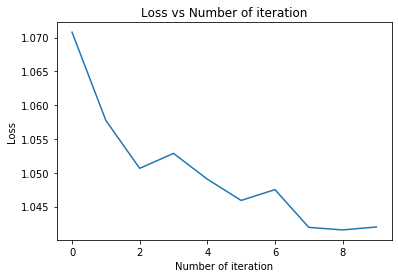

TypeError: imsave() missing 1 required positional argument: 'arr'

In [7]:
visualize_train(history)

In [ ]:
visualize_eval(history)